In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Data Untuk Kondisi Lingkungan (Atmosfer)
g = 9.81                        # Percepatan gravitasi (m/s^2)
M_atm = 28.6                    # Massa molar udara atmosfer (g/mol)
P_ref = 1                       # Tekanan atmosfer di permukaan (atm)
rho_atm_ref = 1.225             # Massa jenis udara di permukaan bumi (g/L)T
T_atm_ref = 288.16              # Suhu udara di permukaan bumi (15 deg.C dalam K)
v_atm_ref = M_atm/rho_atm_ref   # Volume molar udara di permukaan bumi (L/mol)
a_atm = 1.33                    # Koreksi tekanan Van der Waals udara (atm.L^2/mol^2)
b_atm = 0.0366                  # Koreksi volume Van der Waals udara (L/mol)
R = 0.082057                    # Konstanta gas ideal (L.atm/mol.K)
alpha = 6.5*10**-3              # Laju penurunan suhu (deg.C/m)

# Data untuk Kondisi Perubahan Fasa Air
M_H2O = 18.01528                # Massa molar H2O ()
rho_liq = 1000                  # Massa jenis H2O dalam fasa cair (g/L)
rho_vap_ref = 0.6               # Massa jenis H2O dalam fasa gas pada tekanan 1 atm (g/L)
a_H2O = 5.537*0.968             # Koreksi tekanan Van der Waals H2O (atm.L^2/mol^2)
b_H2O = 0.03049                 # Koreksi volume Van der Waals H2O (L/mol)
l = 4.08*10**4                  # Kalor laten uap molar untuk air (J/mol)
T_boil_ref = 373.16             # Titik didih air di permukaan bumi (100 deg.C dalam K)
v_vap_ref = M_H2O/rho_vap_ref   # Volume molar uap air di permukaan bumi

In [25]:
# Fungsi Temperatur
def T(z) :
    y = T_atm_ref - alpha*z
    return y

# Fungsi volume molar udara atmnosfer berdasarkan Tekanan dan Ketinggian
def v_atm(P_atm) :
    def f(v) :
        y = P_atm*v**3-(R*Temp+b_atm)*v**2+a_atm*v-a_atm*b_atm
        return y
    v_guess = 10**6
    v_root = 0
    E = f(v_guess)
    dv = 10**-5
    e = 10**-3
    while E > e :
        v_root = v_guess-f(v_guess)*dv/(f(v_guess+dv)-f(v_guess))
        E = f(v_root)
        v_guess = v_root
    return v_root

# Fungsi massa jenis uap air atmnosfer berdasarkan Tekanan dan Ketinggian
def rho_vap(P_atm) :
    def v_vap(P_atm) :
        def f(v) :
            y = P_atm*v**3-(R*Temp+b_H2O)*v**2+a_H2O*v-a_H2O*b_H2O
            return y
        v_guess = 10**6
        v_root = 0
        E = f(v_guess)
        dv = 10**-5
        e = 10**-3
        while E > e :
            v_root = v_guess-f(v_guess)*dv/(f(v_guess+dv)-f(v_guess))
            E = f(v_root)
            v_guess = v_root
        return v_root
    x = M_H2O/v_vap(P_atm)
    return x

In [26]:
# Data awal
P_atm = P_ref
P_atm_show = P_atm*1013.25
Temp = T_atm_ref
T_boil = T_boil_ref
T_boil_show = T_boil - 273.16
z = 0

# Matriks data
p = [P_atm_show]
h = [z]
t = [T_boil_show]

# Iterasi ketinggian
dz = 10
z_max = 1*10**4
while z < z_max :
    # Perubahan ketinggian
    z += dz

    # Perubahan temperatur udara
    Temp = T(z)

    # Perubahan Tekanan dan Titik Didih
    dP_atm = -M_atm/v_atm(P_atm)*g*dz/(1.013*10**5)
    dT_boil = (M_atm*M_H2O*g*T_boil*(1/rho_liq-1/rho_vap(P_atm)))/(v_atm(P_atm)*l)*dz*10**-3

    # Update Nilai kondisi
    P_atm += dP_atm
    P_atm_show = P_atm*1013.25
    T_boil += dT_boil
    T_boil_show += dT_boil

    # Memasukkan data
    p.append(P_atm_show)
    h.append(z)
    t.append(T_boil_show)

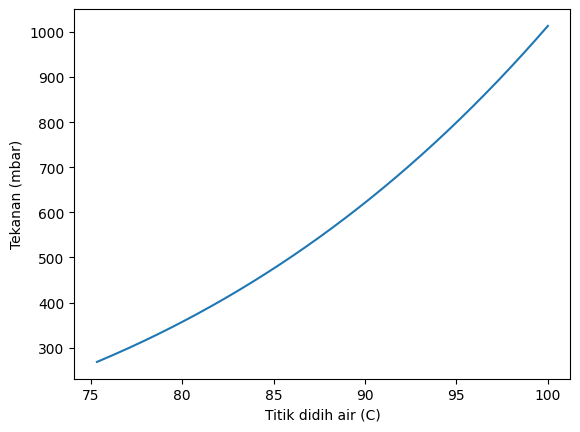

In [27]:
# Plot titik didih terhadap tekanan
plt.plot(t,p)
plt.xlabel("Titik didih air (C)")
plt.ylabel("Tekanan (mbar)")
plt.show()

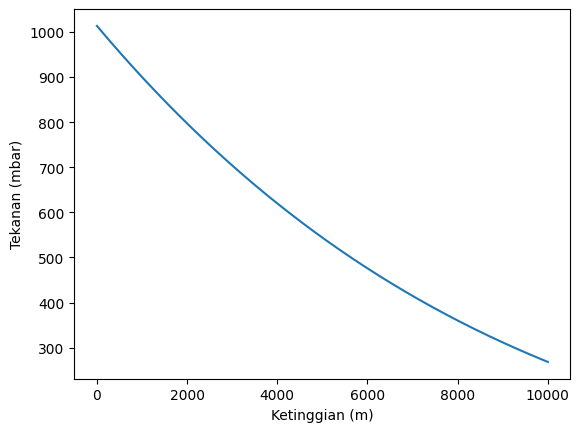

In [28]:
# Plot tekanan terhadap ketinggian
plt.plot(h,p)
plt.xlabel("Ketinggian (m)")
plt.ylabel("Tekanan (mbar)")
plt.show()

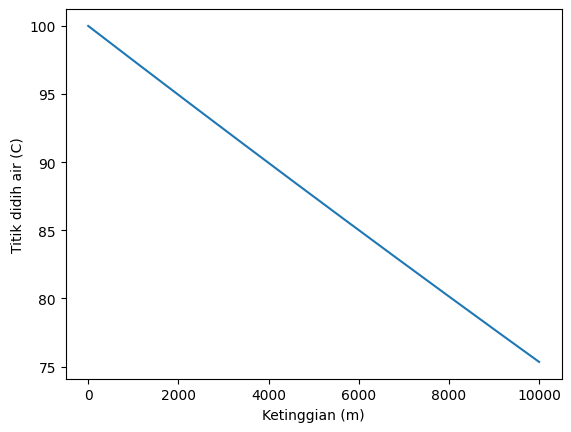

In [29]:
# Plot titik didih terhadap ketinggian
plt.plot(h,t)
plt.xlabel("Ketinggian (m)")
plt.ylabel("Titik didih air (C)")
plt.show()

In [30]:
# Generate data gas ideal
p_teori = np.zeros(len(h))
miss_P = np.zeros(len(h))
def P_teori_show(z):
    y = 1013.25*P_ref*(((T_atm_ref-alpha*z)/T_atm_ref)**(g*M_atm/(alpha*R*1000*101.325)))
    return y
t_teori = np.zeros(len(h))
miss_t = np.zeros(len(h))
def T_boil_teori(P):
    y = T_boil_ref*math.exp(M_H2O*((1/rho_vap_ref)-(1/rho_liq))*(P-P_ref)*101.325/l) - 273.16
    return y
for i in range(len(h)):
    p_teori[i]=P_teori_show(h[i])
    miss_P[i]=p[i]-p_teori[i]
    t_teori[i]=T_boil_teori(p_teori[i]/1013.25)
    miss_t[i]=t[i]-t_teori[i]

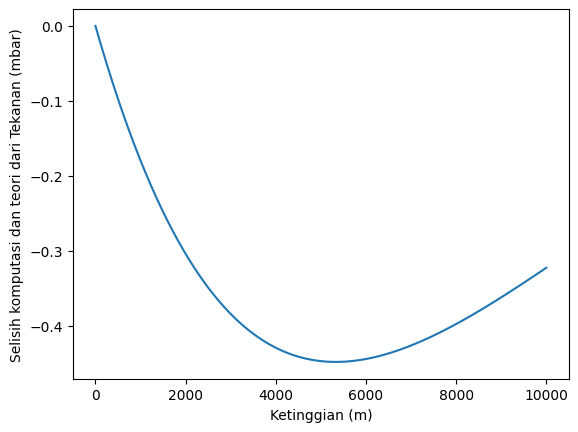

In [31]:
# Selisih tekanan dari komputasi dan gas ideal
plt.plot(h,miss_P)
plt.xlabel("Ketinggian (m)")
plt.ylabel("Selisih komputasi dan teori dari Tekanan (mbar)")
plt.show()

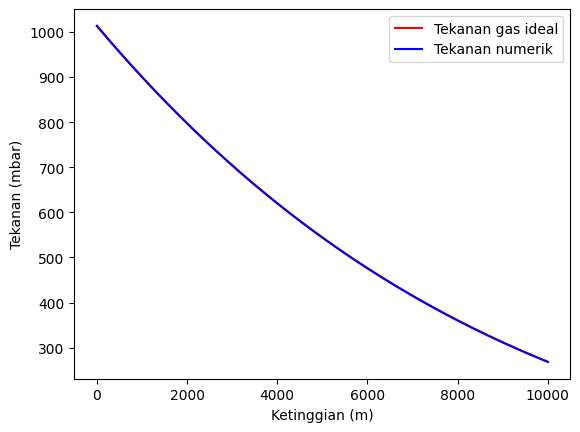

In [32]:
# PErbandingan tekanan terhadap ketinggian menurut gas ideal dengan van der waals
plt.plot(h,p_teori, "r", label = "Tekanan gas ideal")
plt.plot(h,p,"b", label = "Tekanan numerik")
plt.xlabel("Ketinggian (m)")
plt.ylabel("Tekanan (mbar)")
plt.legend()
plt.show()

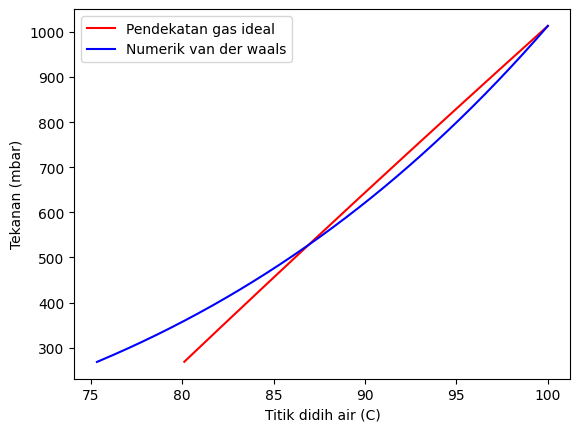

In [33]:
# Perbandingan titik didih air terhadap tekanan menurut gas ideal dan van der waals
plt.plot(t_teori,p_teori, "r", label = "Pendekatan gas ideal")
plt.plot(t,p, "b", label = "Numerik van der waals")
plt.ylabel("Tekanan (mbar)")
plt.xlabel("Titik didih air (C)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


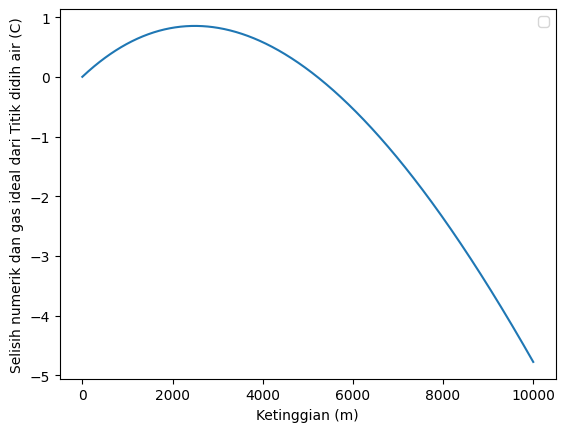

In [34]:
# Selisih titik didih dari gas ideal dengan van der waals
plt.plot(h,miss_t)
plt.xlabel("Ketinggian (m)")
plt.ylabel("Selisih numerik dan gas ideal dari Titik didih air (C)")
plt.legend()
plt.show()

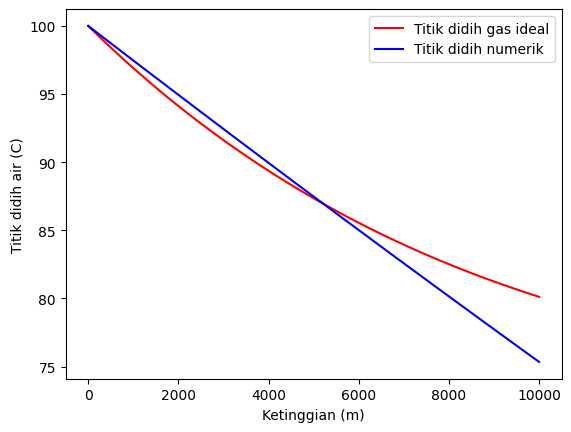

In [35]:
# Perbandingan titik didih terhadap tekanan menurut gas ideal dengan van der waals
plt.plot(h,t_teori, "r", label = "Titik didih gas ideal")
plt.plot(h,t,"b", label = "Titik didih numerik")
plt.xlabel("Ketinggian (m)")
plt.ylabel("Titik didih air (C)")
plt.legend()
plt.show()

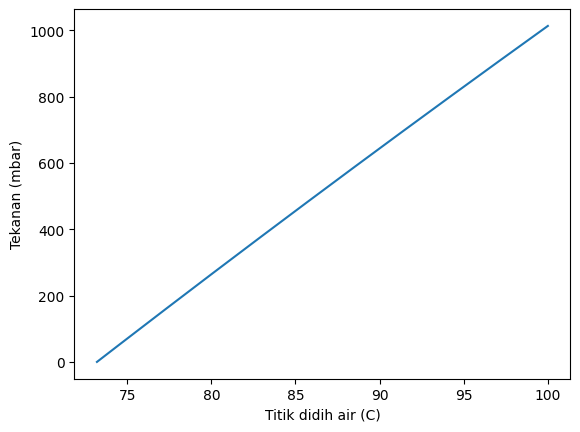

In [36]:
# Diagram fasa menggunakan teori gas ideal
t_test = [T_boil_ref-273.16]
p_test = P_ref
p_test_show = [P_ref*1013.25]
dP = -0.001
for i in range(1000):
    p_test += dP
    z = T_boil_teori(p_test)
    p_test_show.append(p_test*1013.25)
    t_test.append(z)
plt.plot(t_test,p_test_show)
plt.ylabel("Tekanan (mbar)")
plt.xlabel("Titik didih air (C)")
plt.show()